## Modeling Exercises - Time Series Data

In [7]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from acquire import stores_items_sales_data
from prepare import prep_sales
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt


In [3]:
df = stores_items_sales_data()
df = prep_sales(df)
df.head()

Reading from csv file...
Reading from csv file...
Reading from csv file...


,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,2-Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,2-Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,01-Jan,2-Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,01-Jan,2-Tuesday,294.00


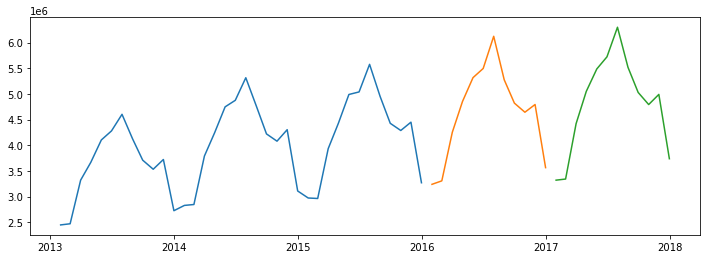

In [6]:
df = df.resample('M').sum()
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']
plt.figure(figsize=(12,4))
plt.plot(train.index, train.sales_total)
plt.plot(validate.index, validate.sales_total)
plt.plot(test.index, test.sales_total)

In [8]:
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [9]:
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [26]:
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [35]:
def make_predictions(dollars=None, items=None):
    yhat_df = pd.DataFrame({'sales_total': [dollars],
                           'sale_amount': [items]},
                          index=validate.index)
    return yhat_df

In [10]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

In [12]:
eval_df

,model_type,target_var,rmse


#### Last Observed Value

In [14]:
dollars = train['sales_total'][-1:][0]

In [15]:
items = train['sale_amount'][-1:][0]

In [16]:
dollars, items

(3268736.22, 607572.0)

In [20]:
yhat_df = pd.DataFrame(
    {'sales_total': [dollars],
     'sale_amount': [items]},
    index=validate.index)

yhat_df.head()

,sales_total,sale_amount
sale_date,,
2016-01-31,3268736.22,607572.0
2016-02-29,3268736.22,607572.0
2016-03-31,3268736.22,607572.0
2016-04-30,3268736.22,607572.0
2016-05-31,3268736.22,607572.0


sales_total -- RMSE: 1620001


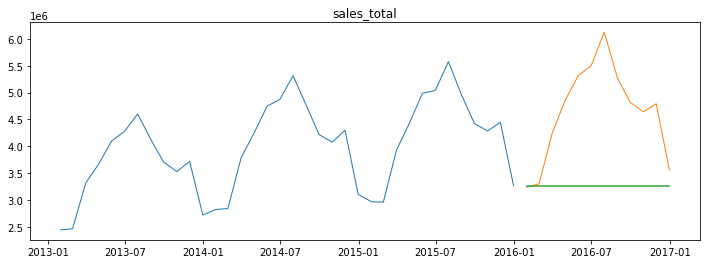

In [21]:
plot_and_eval('sales_total')

sale_amount -- RMSE: 301773


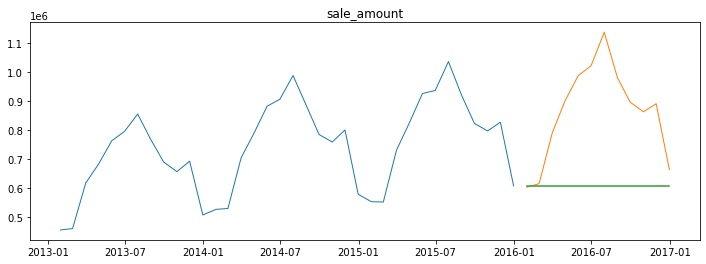

In [22]:
plot_and_eval('sale_amount')

In [23]:
eval_df = append_eval_df(model_type = 'last_observed_value', target_var = 'sales_total')
eval_df = append_eval_df(model_type = 'last_observed_value', target_var = 'sale_amount')

In [24]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,1620001.0
1,last_observed_value,sale_amount,301773.0


---

#### Simple Average

In [25]:
dollars = round(train['sales_total'].mean(), 2)
items = round(train['sale_amount'].mean(), 2)
dollars, items

(3974693.29, 739267.0)

In [28]:
yhat_df = pd.DataFrame({'sales_total': [dollars],
                           'sale_amount': [items]},
                          index=validate.index)
yhat_df.head()

,sales_total,sale_amount
sale_date,,
2016-01-31,3974693.29,739267.0
2016-02-29,3974693.29,739267.0
2016-03-31,3974693.29,739267.0
2016-04-30,3974693.29,739267.0
2016-05-31,3974693.29,739267.0


sales_total -- RMSE: 1089633


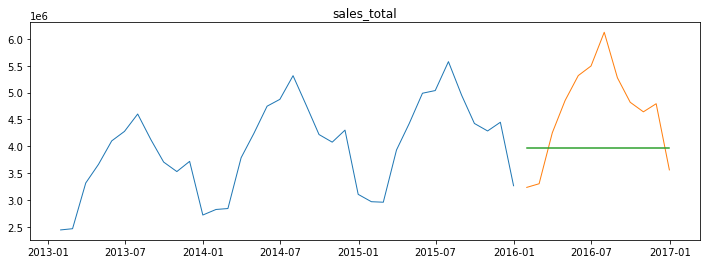

In [29]:
plot_and_eval('sales_total')

sale_amount -- RMSE: 202750


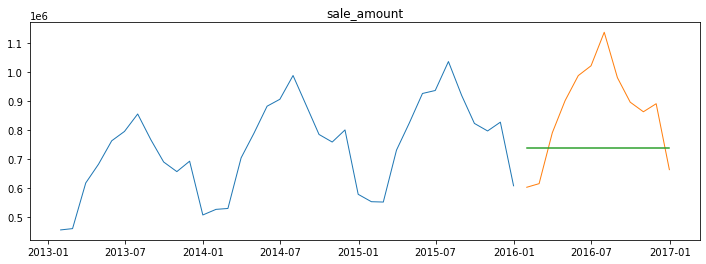

In [30]:
plot_and_eval('sale_amount')

In [31]:
eval_df = append_eval_df(model_type = 'simple_average', target_var = 'sales_total')
eval_df = append_eval_df(model_type = 'simple_average', target_var = 'sale_amount')

In [32]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,1620001.0
1,last_observed_value,sale_amount,301773.0
2,simple_average,sales_total,1089633.0
3,simple_average,sale_amount,202750.0


---

#### 30 Day Moving Average

In [34]:
period = 30
dollars = round(train['sales_total'].rolling(period).mean()[-1], 2)
items = round(train['sale_amount'].rolling(period).mean()[-1], 2)
print(dollars, items)

4093463.67 761359.87


In [36]:
yhat_df = make_predictions(dollars, items)
yhat_df.head()

,sales_total,sale_amount
sale_date,,
2016-01-31,4093463.67,761359.87
2016-02-29,4093463.67,761359.87
2016-03-31,4093463.67,761359.87
2016-04-30,4093463.67,761359.87
2016-05-31,4093463.67,761359.87


sales_total -- RMSE: 1021506


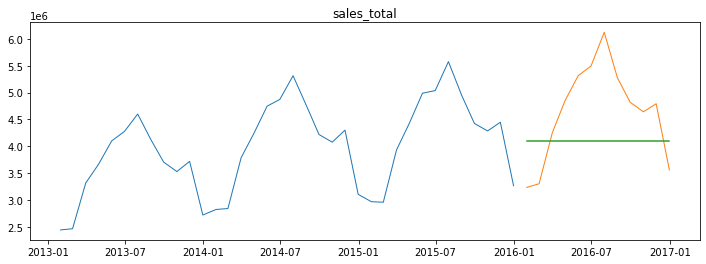

In [37]:
plot_and_eval('sales_total')

sale_amount -- RMSE: 190064


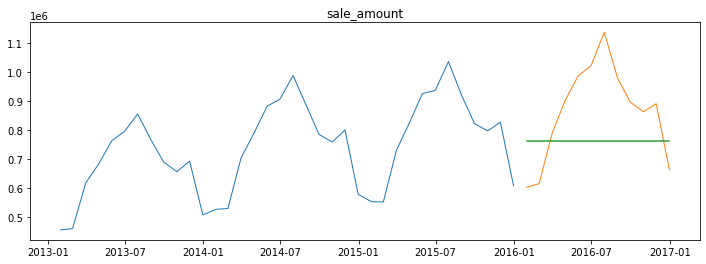

In [38]:
plot_and_eval('sale_amount')

In [39]:
eval_df = append_eval_df(model_type = '30 Day Rolling Average', target_var = 'sales_total')
eval_df = append_eval_df(model_type = '30 Day Rolling Average', target_var = 'sale_amount')
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,1620001.0
1,last_observed_value,sale_amount,301773.0
2,simple_average,sales_total,1089633.0
3,simple_average,sale_amount,202750.0
4,30 Day Rolling Average,sales_total,1021506.0
5,30 Day Rolling Average,sale_amount,190064.0


---

#### Holts Linear Trend

In [43]:
#Make predictions with sales_total and add to yhat_df
col = 'sales_total'
model = Holt(train[col], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = validate.index[0],
                           end = validate.index[-1])
yhat_df[col] = round(yhat_items, 2)

#make predictions with sale_amount and add to yhat_df
col = 'sale_amount'
model = Holt(train[col], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = validate.index[0],
                           end = validate.index[-1])
yhat_df[col] = round(yhat_items, 2)

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_49904/76415413.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model = Holt(train[col], exponential=False, damped=True)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_49904/76415413.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model = Holt(train[col], exponentia

In [44]:
yhat_df

,sales_total,sale_amount
sale_date,,
2016-01-31,3290132.63,611794.26
2016-02-29,3305399.92,614869.97
2016-03-31,3320514.55,617914.91
2016-04-30,3335478.03,620929.41
2016-05-31,3350291.87,623913.76
2016-06-30,3364957.57,626868.27
2016-07-31,3379476.62,629793.23
2016-08-31,3393850.47,632688.95
2016-09-30,3408080.59,635555.71


sales_total -- RMSE: 1526644


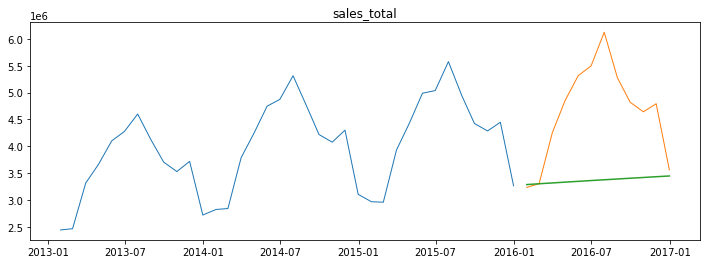

In [45]:
plot_and_eval('sales_total')

sale_amount -- RMSE: 283048


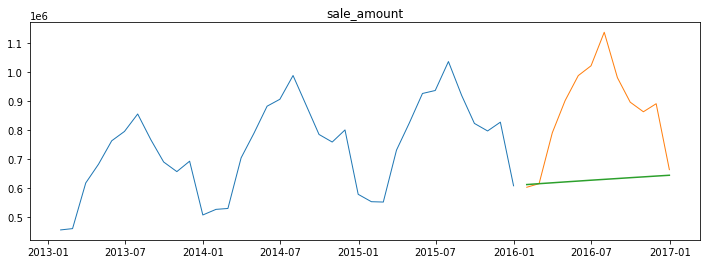

In [46]:
plot_and_eval('sale_amount')

In [47]:
eval_df = append_eval_df(model_type = 'Holts linear trend', target_var = 'sales_total')
eval_df = append_eval_df(model_type = 'Holts linear trend', target_var = 'sale_amount')
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,1620001.0
1,last_observed_value,sale_amount,301773.0
2,simple_average,sales_total,1089633.0
3,simple_average,sale_amount,202750.0
4,30 Day Rolling Average,sales_total,1021506.0
5,30 Day Rolling Average,sale_amount,190064.0
6,Holts linear trend,sales_total,1526644.0
7,Holts linear trend,sale_amount,283048.0


---

#### Predict based on a previous cycle

In [54]:
train.head()

,item_id,sale_amount,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,sales_total
sale_date,,,,,,,,,
2013-01-31,395250,454904.0,7061846500,85250,79986.2,3696266159611120,3696266159611120,1212484400,2447368.20
2013-02-28,357000,459417.0,6378855000,77000,72245.6,3338562982874560,3338562982874560,1095147200,2469765.97
2013-03-31,395250,617382.0,7062761000,85250,79986.2,3696266159611120,3696266159611120,1212484400,3319815.58
2013-04-30,382500,682274.0,6835387500,82500,77406.0,3577031767365600,3577031767365600,1173372000,3666901.23
2013-05-31,395250,763242.0,7063706500,85250,79986.2,3696266159611120,3696266159611120,1212484400,4102278.40


In [82]:
yhat_df = train[['sale_amount', 'sales_total']]

In [83]:
yhat_df.head()

,sale_amount,sales_total
sale_date,,
2013-01-31,454904.0,2447368.20
2013-02-28,459417.0,2469765.97
2013-03-31,617382.0,3319815.58
2013-04-30,682274.0,3666901.23
2013-05-31,763242.0,4102278.40


In [84]:
yhat_df.tail()

,sale_amount,sales_total
sale_date,,
2015-08-31,920401.0,4951252.98
2015-09-30,823332.0,4426326.24
2015-10-31,797253.0,4286868.40
2015-11-30,827645.0,4448745.67
2015-12-31,607572.0,3268736.22


In [85]:
yhat_df.describe()

,sale_amount,sales_total
count,3.600000e+01,3.600000e+01
mean,7.392670e+05,3.974693e+06
std,1.538290e+05,8.268004e+05
min,4.549040e+05,2.447368e+06
25%,6.149295e+05,3.307046e+06
50%,7.650015e+05,4.114060e+06
75%,8.347142e+05,4.486974e+06
max,1.037350e+06,5.575319e+06


In [86]:
yhat_df['2015']

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_49904/3935294183.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  yhat_df['2015']


,sale_amount,sales_total
sale_date,,
2015-01-31,552513.0,2971740.70
2015-02-28,551317.0,2962257.74
2015-03-31,730951.0,3932960.55
2015-04-30,824467.0,4427214.12
2015-05-31,926902.0,4988111.92
2015-06-30,937184.0,5037761.76
2015-07-31,1037350.0,5575319.12
2015-08-31,920401.0,4951252.98
2015-09-30,823332.0,4426326.24


In [87]:
yhat_df.diff(12).mean()

sale_amount     66485.166667
sales_total    357433.869167
dtype: float64

In [88]:
yhat_df = yhat_df['2015'] + yhat_df.diff(12).mean()

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_49904/3813133034.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  yhat_df = yhat_df['2015'] + yhat_df.diff(12).mean()


In [89]:
yhat_df.head()

,sale_amount,sales_total
sale_date,,
2015-01-31,618998.166667,3.329175e+06
2015-02-28,617802.166667,3.319692e+06
2015-03-31,797436.166667,4.290394e+06
2015-04-30,890952.166667,4.784648e+06
2015-05-31,993387.166667,5.345546e+06


In [90]:
yhat_df.index = validate.index

sales_total -- RMSE: 75034


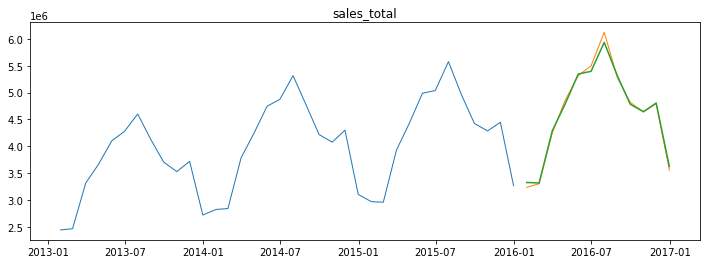

In [91]:
plot_and_eval('sales_total')

sale_amount -- RMSE: 13676


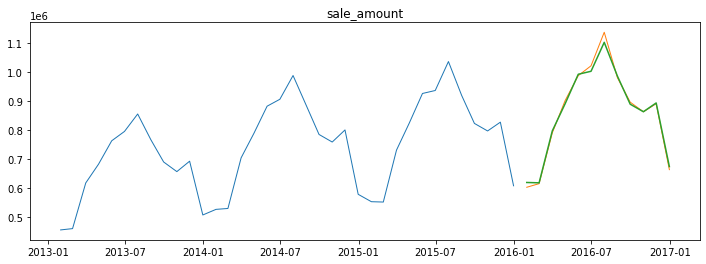

In [92]:
plot_and_eval('sale_amount')

In [93]:
eval_df = append_eval_df(model_type = 'Previous cycle', target_var = 'sales_total')
eval_df = append_eval_df(model_type = 'Previous cycle', target_var = 'sale_amount')
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,1620001.0
1,last_observed_value,sale_amount,301773.0
2,simple_average,sales_total,1089633.0
3,simple_average,sale_amount,202750.0
4,30 Day Rolling Average,sales_total,1021506.0
5,30 Day Rolling Average,sale_amount,190064.0
6,Holts linear trend,sales_total,1526644.0
7,Holts linear trend,sale_amount,283048.0
8,Previous cycle,sales_total,75034.0
9,Previous cycle,sale_amount,13676.0


---